In [11]:
import tensorflow as tf

Drive not mounted, so nothing to flush and unmount.


In [12]:
pip install aotools

In [ ]:
pip install pillow

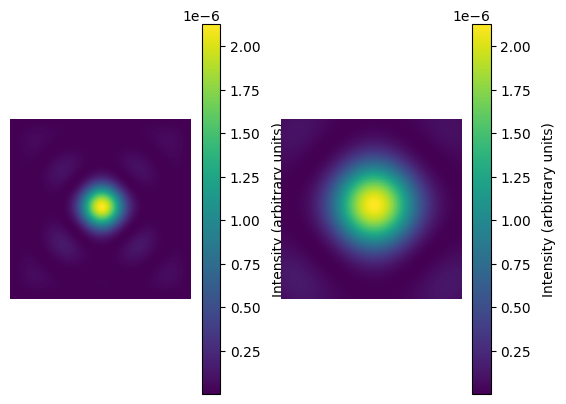

In [13]:
import numpy as numpy
import matplotlib.pylab as plt
import random
import aotools
import PIL

j=0+1j
nx_size = 128 # pxls
D = 0.04 # m
pxlUnits = 1/128 # m/pxl
pad_factor = 2
r0 = 0.16 # m
L0 = 50 # m
l0 = 1e-3 # m
wavelength = 500e-9 # m

pupil = aotools.circle(D/pxlUnits/2, nx_size)

PS=aotools.turbulence.phasescreen.ft_phase_screen(r0, 2*nx_size, pxlUnits, L0, l0)


wave_signal=complex_field = numpy.exp(j*PS)
prop_signal=aotools.opticalpropagation.angularSpectrum(wave_signal, wavelength, pxlUnits , pxlUnits, 1)

pad_size = 2*nx_size
padded_pupil = numpy.zeros((pad_size, pad_size))
padded_pupil[:nx_size, :nx_size] = pupil

complex_wave = padded_pupil*numpy.exp(j*PS)


E_f = aotools.ft2(complex_wave, delta=pxlUnits,)
psf = numpy.abs(E_f)**2
psf_cut = psf[int(pad_size/2-nx_size/2):int(pad_size/2+nx_size/2), int(pad_size/2-nx_size/2):int(pad_size/2+nx_size/2)]

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(psf)
plt.axis('off')
cbar = plt.colorbar()
cbar.set_label('Intensity (arbitrary units)', labelpad=8)
plt.subplot(1, 2, 2)
plt.imshow(psf_cut)
plt.axis('off')
cbar = plt.colorbar()
cbar.set_label('Intensity (arbitrary units)', labelpad=8)


NameError: name 'aotools' is not defined

SyntaxError: unterminated string literal (detected at line 74) (<ipython-input-6-065963fbf25d>, line 74)

Streaming output truncated to the last 5000 lines.
15000
15001
15002
15003
15004
15005
15006
15007
15008
15009
15010
15011
15012
15013
15014
15015
15016
15017
15018
15019
15020
15021
15022
15023
15024
15025
15026
15027
15028
15029
15030
15031
15032
15033
15034
15035
15036
15037
15038
15039
15040
15041
15042
15043
15044
15045
15046
15047
15048
15049
15050
15051
15052
15053
15054
15055
15056
15057
15058
15059
15060
15061
15062
15063
15064
15065
15066
15067
15068
15069
15070
15071
15072
15073
15074
15075
15076
15077
15078
15079
15080
15081
15082
15083
15084
15085
15086
15087
15088
15089
15090
15091
15092
15093
15094
15095
15096
15097
15098
15099
15100
15101
15102
15103
15104
15105
15106
15107
15108
15109
15110
15111
15112
15113
15114
15115
15116
15117
15118
15119
15120
15121
15122
15123
15124
15125
15126
15127
15128
15129
15130
15131
15132
15133
15134
15135
15136
15137
15138
15139
15140
15141
15142
15143
15144
15145
15146
15147
15148
15149
15150
15151
15152
15153
15154
15155
15156
15157
1

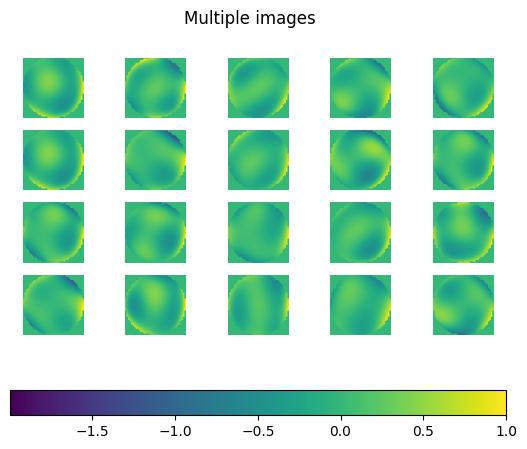

[[0 0 1 ... 0 0 0]
 [1 0 0 ... 0 1 1]
 [0 1 0 ... 0 1 0]
 ...
 [1 0 0 ... 1 1 1]
 [1 1 0 ... 1 1 0]
 [0 1 0 ... 0 1 1]]


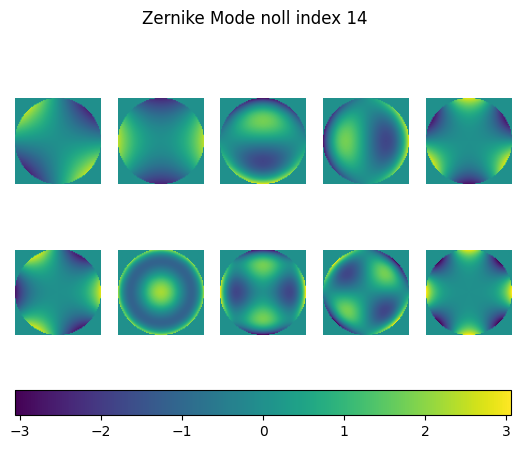

In [28]:
import random

import numpy
import matplotlib.pylab as plt
from tqdm import tqdm, trange, tqdm_notebook
from PIL import Image
from aotools.turbulence import phasescreen, infinitephasescreen
from matplotlib import colors
## offsets
## Subapetures adjustments
## Noise units
## distinguishable pattens?

print(1)


def ZernikeData(Wavefront,n_zerns,Display,nxsize):
    if (Display == "yes"):
        Zs = aotools.zernikeArray(n_zerns, nxsize)
        z_coefficients = numpy.zeros((1, n_zerns))
        z_coefficients[0] = (Wavefront * Zs).sum((-1, -2))/(Zs[0].sum())
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(E_f)
        plt.axis('off')
        cbar = plt.colorbar()
        cbar.set_label('Intensity (arbitrary units)', labelpad=8)
        return z_coefficients
    else:
        Zs = aotools.zernikeArray(n_zerns, nxsize)
        z_coefficients = numpy.zeros((1, n_zerns))
        z_coefficients[0] = (Wavefront * Zs).sum((-1, -2))/(Zs[0].sum())
        return z_coefficients

def SpecificNoiseGenerator(nxsize,seed,Stats,display):
   # pixels
  D = 0.05 # m
  pxlUnits = D/nxsize # m/pxl
  r0 = 0.14 # m
  L0 = 96 # m
  l0 = 9e-3 # m
  wavelength = 500e-9
  distance=5000


  pupil = aotools.circle(D/pxlUnits/2, nxsize)
  if (Stats=="p"):
    PS=aotools.turbulence.phasescreen.ft_phase_screen(r0, nxsize, pxlUnits, L0, l0,seed=seed)

    wave_signal=complex_field = numpy.exp(j*PS)
    prop_signal=aotools.opticalpropagation.angularSpectrum(wave_signal, wavelength, pxlUnits, pxlUnits, distance)
    if (display=="yes"):
      plt.figure()
      plt.subplot(1,2,1)
      plt.imshow(numpy.angle(prop_signal))
  return numpy.angle(numpy.power(prop_signal,1))

  PS=infinitephasescreen.PhaseScreenKolmogorov(nx * 2, pxlUnits, r0, L0)
  complex_field = numpy.exp(j*PS.scrn)
  pad_size = 2*nx
  padded_pupil = numpy.zeros((pad_size, pad_size))
  padded_pupil[:nx, :nx] = pupil
  complex_wave = padded_pupil*numpy.exp(j*PS)
  if (display=="yes"):
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(numpy.angle(prop_signal))
  return numpy.angle(numpy.power(prop_signal,1))

##print(SpecificNoiseGenerator(60,2,"p","yes"))
##Truearr=ZernikeData(superpose,n_zerns,"no",nxsize)

 ##print(f"True vals{randarr} and pred vals {Truearr}")



def ZernikeImages(start_zern,end_zern,SubapArr):
  zernikearray=aotools.zernikeArray(end_zern,SubapArr)[(start_zern-1):]




  datasets=[
                      numpy.power(zernikearray[i],1)
                      for i in range(len(zernikearray))
                      ]

  fig, axs = plt.subplots(2, 5)
  norm = colors.Normalize(vmin=numpy.min(datasets), vmax=numpy.max(datasets))
  images = []
  i=-1
  for ax, data in zip(axs.flat, datasets):
      i+=1
      fig.suptitle(f'Zernike Mode noll index {i+start_zern}')
      images.append(ax.imshow(data, norm=norm))
      ax.axis("off")
  fig.colorbar(images[0], ax=axs, orientation='horizontal', fraction=.1)
  plt.show()






def RandomZernikeComp(start_zern,end_zern,iter,nxsize,seed,display,save,noise):
    random.seed(seed)
    image_arr=[]
    labelarr=[]
    datasets=[]
    NoiseArr=[]

    if (noise=="yes"):
      for z in range(iter):
          zernike_array = aotools.zernikeArray(end_zern,nxsize)[start_zern-1:]

          randarr = [random.randint(0,1) for _ in range(end_zern-start_zern)]
          labelarr.append(randarr)
          iarr=[]

          for i in range(end_zern-start_zern):
              iarr.append(i)
              zernike_array[i]=zernike_array[i]*randarr[i]

          superpose=numpy.zeros((nxsize,nxsize))

          for j in range(len(iarr)):
              superpose+=zernike_array[j]

          maxval=numpy.argmax(superpose)
          if (maxval!=0):
              superpose1=superpose/numpy.max(superpose)

          noisetemp=numpy.array(SpecificNoiseGenerator(nxsize,seed+z,"p","no"))

          NoiseArr.append(noisetemp)
          superpose1=numpy.add((superpose1),(noisetemp))
          image_arr.append(superpose1)

          if (save=="yes"):
            PIL_image = Image.fromarray(numpy.uint8(superpose1)).convert('L')
            PIL_image.save(f'/Images3/ML{10000+z}.png', 'PNG')
          print(z)


    else:

      for z in range(iter):
          zernike_array = aotools.zernikeArray(end_zern,nxsize)[start_zern-1:]

          randarr = [random.randint(0,1) for _ in range(end_zern-start_zern)]
          labelarr.append(randarr)
          iarr=[]

          for i in range(end_zern-start_zern):
              iarr.append(i)
              zernike_array[i]=zernike_array[i]*randarr[i]

          superpose=numpy.zeros((nxsize,nxsize))
## 3)
          for j in range(len(iarr)):
              superpose+=zernike_array[j]

## 4)
          maxval=numpy.argmax(superpose)
          if (maxval!=0):
              superpose1=superpose/numpy.max(superpose)


          image_arr.append(superpose1)

          if (save=="yes"):
            PIL_image = Image.fromarray(numpy.uint8(superpose1)).convert('L')
            PIL_image.save(f'/Images3/ML{10000+z}.png', 'PNG')
          print(z)


    if display=="yes":

          fig, axs = plt.subplots(4, 5)
          fig.suptitle('Multiple images')

          if (noise=="no"):
                datasets=[
                        numpy.power(image_arr[i],1)
                        for i in range(iter)
                        ]
          else:

           datasets=[
                      numpy.power(image_arr[i],1)
                      for i in range(iter)
                      ]


           datasetsNoise=[

                  NoiseArr[i]
                  for i in range(iter)

                  ]

           datasets=numpy.append(datasets,datasetsNoise, axis=0)




          norm = colors.Normalize(vmin=numpy.min(datasets), vmax=numpy.max(datasets))
          images = []
          for ax, data in zip(axs.flat, datasets):
              images.append(ax.imshow(data, norm=norm))
              ax.axis("off")
          fig.colorbar(images[0], ax=axs, orientation='horizontal', fraction=.1)
          plt.show()


    return  numpy.array(labelarr), numpy.array(image_arr)

labels1, ImageData =RandomZernikeComp(5,15,20000,40,80000,"yes","no","no")
print(labels1)
labels1=numpy.array(labels1)

ZernikeImages(5,15,80)



In [ ]:
## 1) Randarr, an array where all modes in n_zern range are active with a 1 or inactive with a 0 in the superposition that is made by the function i.e the 1st element of randarr corresponds to eliminating or keeping the 1st zernike mode which is in zernike_array[1]

## 1)b May be better to vary 1s and 0s with some fluctuation i.e +- 0.2 as it wont be perfect in actual emitted signals

## 2) Multiplies the randarr array with the zernike array elementwise either reducing a whole zernike mode to 0 or keeping it with the values it had previous when multiplied by 1

## 3) iterates through zernike array and sums every zernike mode in altered zernike array to get the superposition of the modes not reduced to 0

## 4) Normalises every zernike mode such that wavefront deviations are between 0-1

In [ ]:

tf.keras.preprocessing.image_dataset_from_directory(
    "/Images2/",
    labels=labelsTrue,
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True
)

TypeError: 'module' object is not callable

In [ ]:
import os
sorted_dir = sorted(os.listdir('/Images/'))
print(sorted_dir)

['ML0.png', 'ML1.png', 'ML10.png', 'ML100.png', 'ML101.png', 'ML102.png', 'ML103.png', 'ML104.png', 'ML105.png', 'ML106.png', 'ML107.png', 'ML108.png', 'ML109.png', 'ML11.png', 'ML110.png', 'ML111.png', 'ML112.png', 'ML113.png', 'ML114.png', 'ML115.png', 'ML116.png', 'ML117.png', 'ML118.png', 'ML119.png', 'ML12.png', 'ML120.png', 'ML121.png', 'ML122.png', 'ML123.png', 'ML124.png', 'ML125.png', 'ML126.png', 'ML127.png', 'ML128.png', 'ML129.png', 'ML13.png', 'ML130.png', 'ML131.png', 'ML132.png', 'ML133.png', 'ML134.png', 'ML135.png', 'ML136.png', 'ML137.png', 'ML138.png', 'ML139.png', 'ML14.png', 'ML140.png', 'ML141.png', 'ML142.png', 'ML143.png', 'ML144.png', 'ML145.png', 'ML146.png', 'ML147.png', 'ML148.png', 'ML149.png', 'ML15.png', 'ML150.png', 'ML151.png', 'ML152.png', 'ML153.png', 'ML154.png', 'ML155.png', 'ML156.png', 'ML157.png', 'ML158.png', 'ML159.png', 'ML16.png', 'ML160.png', 'ML161.png', 'ML162.png', 'ML163.png', 'ML164.png', 'ML165.png', 'ML166.png', 'ML167.png', 'ML168.pn

['[0 0 0 0 0]' '[0 0 0 1 0]' '[0 0 0 1 1]' '[0 0 1 1 0]' '[0 1 0 0 0]'
 '[0 1 1 0 0]' '[0 1 1 0 1]' '[1 0 1 1 0]' '[1 1 0 1 0]']


In [ ]:
keras.applications.InceptionV3(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
    name="inception_v3",
)


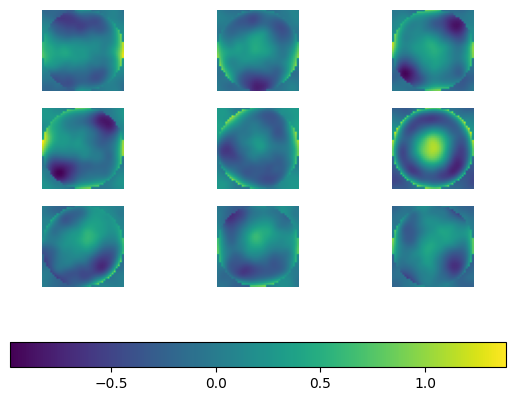

1024


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/8
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.3777 - loss: 4.1300 - val_accuracy: 0.9945 - val_loss: 0.0758
Epoch 2/8
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9958 - loss: 0.0592 - val_accuracy: 0.9987 - val_loss: 0.0223
Epoch 3/8
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9977 - loss: 0.0281 - val_accuracy: 0.9965 - val_loss: 0.0348
Epoch 4/8
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9953 - loss: 0.0366 - val_accuracy: 0.9885 - val_loss: 0.0508
Epoch 5/8
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9809 - loss: 0.0871 - val_accuracy: 0.9808 - val_loss: 0.0928
Epoch 6/8
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9870 - loss: 0.0676 - val_accuracy: 0.9995 - val_loss: 0.0092
Epoch 7/8
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9983 - loss: 0.0168 - val_accuracy: 0.9985 - val_loss: 0.0134
Epoch 8/8
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9972 - loss: 0.0228 - val_accuracy:

In [29]:

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split





def ZernikeComposer(activationArr1,nxsize,display):

  superposearr=[]

  for z in range(len(activationArr1)):
      zernike_array = aotools.zernikeArray(len(activationArr1[0]),nxsize)
      iarr=[]
      for i in range(len(activationArr1[0])):
          zernike_array[i]=zernike_array[i]*activationArr1[z][i]
          iarr.append(i)

      superpose=numpy.zeros((nxsize,nxsize))

      for j in range(len(activationArr1[0])):
          superpose+=zernike_array[j]

      maxval=numpy.argmax(superpose)
      if (maxval!=0):
          superpose1=superpose/numpy.max(superpose)

      superpose1=numpy.add((superpose1),(SpecificNoiseGenerator(nxsize,3000+z,"p","no")))
      superposearr.append(superpose1)
  if(display=="true"):


    datasets=[
                    numpy.power(superposearr[i],1)
                    for i in range(len(superposearr))
                    ]

    fig, axs = plt.subplots(3, 3)
    norm = colors.Normalize(vmin=numpy.min(datasets), vmax=numpy.max(datasets))
    images = []
    for ax, data in zip(axs.flat, datasets):
        images.append(ax.imshow(data, norm=norm))
        ax.axis("off")

    fig.colorbar(images[0], ax=axs, orientation='horizontal', fraction=.1)
    plt.show()

  return numpy.array(superposearr)



def MLmodelSequential(Images,labels,split,Image):

  labels2=numpy.array([str(x) for x in labels])
  UniqueArr=numpy.unique(labels2)

  NumOfClasses=len(UniqueArr)
  print(NumOfClasses)

  def Encoder(labels):

    frame=numpy.zeros((len(labels),NumOfClasses))
    le = LabelEncoder()
    le.fit(UniqueArr)
    labelsTrue=numpy.array(le.transform(labels2))


    for i in range(len(labels2)):
      frame[i][labelsTrue[i]]=1

    return frame

  labelsA=Encoder(labels)

  ImageTrain, ImageTest, LabelTrain, LabelTest = train_test_split( Images, labelsA, test_size=split, random_state=42)
  ImageTrain,LabelTrain=numpy.array(ImageTrain),numpy.array(LabelTrain)
  ImageTest,LabelTest=numpy.array(ImageTest),numpy.array(LabelTest)

  model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(40, 40)),
    tf.keras.layers.Dense(228, activation='relu'),
    tf.keras.layers.Dense(NumOfClasses)])

  model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

  model.fit(ImageTrain, LabelTrain , epochs=8, validation_data=(ImageTest,LabelTest), shuffle=True)
  model.save('/Models/Mymodel.keras')
  if(len(Image)!=0):
     print(1), print(labelsA)
     prediction=model.predict(Image, batch_size=len(Image))
     arr=[]
     for i in range(len(prediction)):
      arr.append(UniqueArr[numpy.argmax(prediction[i])])

     return arr






testActivationdata=[
[0,0,0,0,0,1,0,1,0,0,1,0,0,1],
 [0,0,0,0,0,1,0,0,1,0,1,0,0,0],
  [0,0,0,0,1,0,0,0,0,0,1,0,0,1],
   [0,0,0,0,1,0,0,0,0,0,1,0,0,1],
    [0,0,0,0,0,0,0,0,0,1,1,0,0,0],
     [0,0,0,0,0,0,0,0,0,0,1,0,0,0],
      [0,0,0,0,0,0,0,1,0,0,1,0,1,0],
       [0,0,0,0,0,0,1,0,0,0,1,0,0,1],
        [0,0,0,0,0,1,0,0,0,0,1,1,1,1]]



print(MLmodelSequential(ImageData,labels1, 0.2,ZernikeComposer(testActivationdata,40,"true")))









In [ ]:
j=[6,7,3,4,5,6]
z=[[1,2,3],[1,3,4]]
print()
print(j[4:])


[5, 6]
